In [1]:
#pre-processing, handling missing value, outliers treatment, label encoding


In [2]:
#in ML, if we run data set with missing values it will throw error, either we have to drop that data or fill it with
#some data

In [3]:
#handling missing values - 1. Inputation - replace with new value - either by mean/median
#if no outlier prefer mean
#prefer median if there is outlier
#2.Drop/delete entire row/obervation
 
#Always try imputation approach

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.getcwd()

'/home/justdial/learnbae_ml/Statistics/Stats-5'

In [5]:
df =pd.read_excel("data_preprocessing.xlsx")
df.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,NaN,Graduate,2.0


In [6]:
df.describe()

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [7]:
df.describe(include="O")

,Dept,Experience,Education
count,31,29,31
unique,4,15,5
top,HR,12,Master
freq,13,6,12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [9]:
#here total entries are 33, but dept has just 31 non-null, age 30 non-null
#means it has missing values


In [10]:
df.isnull().sum()

Dept          2
Age           3
Experience    4
Salary        2
Education     2
Projects      6
dtype: int64

In [11]:
df.isnull().sum().sum()

19

In [12]:
df.isnull().any()

Dept          True
Age           True
Experience    True
Salary        True
Education     True
Projects      True
dtype: bool

In [13]:
#calculate per of missing value for each colmn
df.isnull().sum()/len(df)*100

Dept           6.060606
Age            9.090909
Experience    12.121212
Salary         6.060606
Education      6.060606
Projects      18.181818
dtype: float64

In [14]:
# in above 1st approach - if we have very small missing value - 0.05% - we can drop that row
# in above 2nd approach - if we have very large missing value more than 50per-we can drop that column

In [15]:
df1=df.copy()

In [16]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [17]:
#if type is object, it is categorical, so we have to apply mode

In [18]:
#handling AGE missing value - through mean/median


In [19]:
#fillna - wherever missing values it will repalce with mean
#age has 31 non-empty, but still has empty values
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [20]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [21]:
#fillna - wherever missing values it will repalce with MEDIAN
#age has 31 non-empty, but still has empty values
#df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [22]:
#handling SALARY missing value - through mean/median

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [24]:
#here salary has 31 non-null, still has 2 empty values, here we apply median

In [25]:
df1['Salary'] = df1['Salary'].fillna(df1['Salary'].median())

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [27]:
#above exp has d-type has object, ideally it shud be flaot/int, because some random data is there
#and if we apply median/mean it will throw error

In [28]:
#this wud throw error
#df1['Experience'] = df1['Experience'].fillna(df1['Experience'].median())

In [29]:
#here if we apply mode it will work as it is object
#but ideally it shud be flaot, becuase of wrong data it is object
#we shud apply median/mean - for this we have to CONVERT object to numeric

In [30]:
#will throw error
#df1['Experience'] = pd.to_numeric(df1['Experience'])

In [31]:
#above we got to know where error is there

In [32]:
df1['Experience'].mask((df1['Experience'].eq(".")), inplace=True)
#inplace it does in df1, instead of createing new var

In [33]:
df1['Experience'].isnull().sum()

5

In [34]:
#so now we convereted '.' to empty, so it increases frm 4 to 5
#now again check converting to median

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  28 non-null     object 
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [36]:
#its still object

In [37]:
#will throw error
#df1['Experience'] = pd.to_numeric(df1['Experience'])

In [38]:
#ALL THIS IS DATA CLEANING

In [39]:
df1['Experience'].mask((df1['Experience'].eq("%")), inplace=True)

In [40]:
df1['Experience'].isnull().sum()

6

In [41]:
#will throw error
#df1['Experience'] = df1['Experience'].fillna(df1['Experience'].median())

In [42]:
df1['Experience'].mask((df1['Experience'].eq("a")), inplace=True)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  26 non-null     object 
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [44]:
df1['Experience'] = df1['Experience'].fillna(df1['Experience'].median())

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [46]:
#now  experience is cleaned and null values is replaced

In [47]:
df1['Projects'] = df1['Projects'].fillna(df1['Projects'].mean())

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [49]:
#we can handle categorical varaible(object ) with mode approach

In [50]:
df1['Dept'] = df1['Dept'].fillna(df1['Dept'].mode())

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [52]:
#it still didnt work, because we shud send 1st mode

In [53]:
df1['Dept'] = df1['Dept'].fillna(df1['Dept'].mode()[0])
#applying 1st mode

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [55]:
#will throw error
#df1['Education'] = df1['Education'].fillna(df1['Education'].mode()[2])

In [56]:
#above it threw error, as it is out of range , so always pass 1st mode

In [57]:
df1['Education'] = df1['Education'].fillna(df1['Education'].mode()[0])

In [58]:
df1.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,37.333333,13.136364,41984.848485,2.148148
std,17.792789,10.616374,15490.160611,1.137533
min,0.000000,0.000000,20000.000000,0.000000
25%,31.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [60]:
#no missing data evrryting 33

In [61]:
df1['Dept'].value_counts()

HR           15
IT            8
Sales         6
Marketing     4
Name: Dept, dtype: int64

In [62]:
df1['Education'].value_counts()

Master            14
Under_Graduate     9
Graduate           8
a                  1
?                  1
Name: Education, dtype: int64

In [63]:
#ALWAYS for Categorical data, check value_counts, above we have wrong data, a and ?, now clean the data

In [64]:
df1['Education'] = df1['Education'].replace("?",df1['Education'].mode()[0])

In [65]:
df1['Education'].value_counts()

Master            15
Under_Graduate     9
Graduate           8
a                  1
Name: Education, dtype: int64

In [66]:
#now it replaced ? with master

In [67]:
df1['Education'] = df1['Education'].replace("a",df1['Education'].mode()[0])

In [68]:
df1['Education'].value_counts()

Master            16
Under_Graduate     9
Graduate           8
Name: Education, dtype: int64

In [69]:
df1.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,37.333333,13.136364,41984.848485,2.148148
std,17.792789,10.616374,15490.160611,1.137533
min,0.000000,0.000000,20000.000000,0.000000
25%,31.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


In [70]:
#ABOVE, AGE has minn value is 0, its interpretation is very wrong,, there can be no age wth 0 value
#so age value of 0 value shud be replaaced

In [71]:
df1['Age'] = df1['Age'].replace(0,df1['Age'].mean())

In [72]:
df1.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,40.727273,13.136364,41984.848485,2.148148
std,13.192342,10.616374,15490.160611,1.137533
min,19.000000,0.000000,20000.000000,0.000000
25%,32.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


In [73]:
#now age min value is 29, instead of 0

In [74]:
#handling multi columns missing value in one line

In [75]:
cat_cols =['Dept', 'Education']

In [76]:
df2 = df1.copy()

In [77]:
df2[cat_cols]=df2[cat_cols].fillna(df2[cat_cols].mode().iloc[0])

In [78]:
num_col = ['Age', 'Experience', 'Projects']

In [79]:
df2[num_col]=df2[num_col].fillna(df2[num_col].mean())

In [80]:
#2nd METHOD - DROP approach

In [81]:
#df3.dropna(inplace=True)#will drop all rows with NAN value in any column

# Feature Engineering - Outlier Treatment

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


<AxesSubplot:>

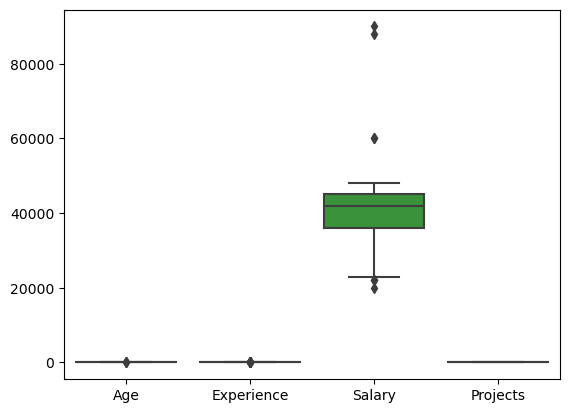

In [83]:
sns.boxplot(data=df1)


In [84]:
df1.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,40.727273,13.136364,41984.848485,2.148148
std,13.192342,10.616374,15490.160611,1.137533
min,19.000000,0.000000,20000.000000,0.000000
25%,32.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


<AxesSubplot:ylabel='Salary'>

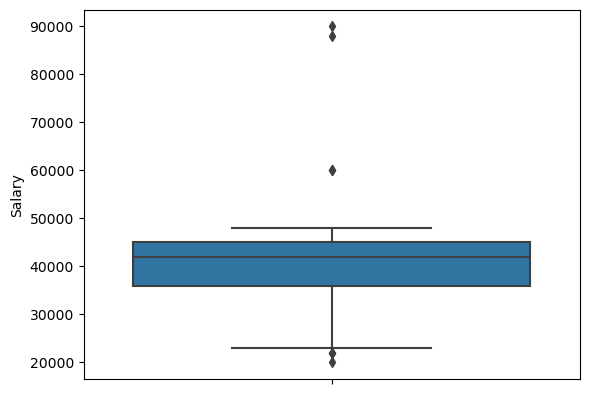

In [85]:
sns.boxplot(y="Salary",data=df1)

In [86]:
#it seems there is a outlier


# but we confirm using IQR AAPPROACH

In [87]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
iqr = Q3-Q1
upper_fence= Q3+1.5*iqr
lower_fence= Q1-1.5*iqr
print('upper fence \n', upper_fence)
print('lowe fence \n', lower_fence)

upper fence 
 Age              64.5
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64
lowe fence 
 Age              12.5
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64


# Adjustment of outliers - 1. Removal of outliers

In [88]:
#Removal of outliers
df10 = df1[~((df1<lower_fence)|(df1>upper_fence)).any(axis=1)]

/tmp/ipykernel_10543/2212026952.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df10 = df1[~((df1<lower_fence)|(df1>upper_fence)).any(axis=1)]


In [89]:
df1.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,40.727273,13.136364,41984.848485,2.148148
std,13.192342,10.616374,15490.160611,1.137533
min,19.000000,0.000000,20000.000000,0.000000
25%,32.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


In [90]:
df10.describe()

,Age,Experience,Salary,Projects
count,18.000000,18.000000,18.000000,18.000000
mean,38.462963,11.777778,40611.111111,2.430041
std,7.206695,0.732084,5574.510149,1.182741
min,29.000000,10.000000,26000.000000,0.000000
25%,33.250000,11.250000,39000.000000,2.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,41.000000,12.000000,45000.000000,3.000000
max,56.000000,13.000000,48000.000000,5.000000


In [91]:
#compared to df1, salary max has been droppped, everything less than lowerfence & more than upper_fence is dropped

In [92]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        18 non-null     object 
 1   Age         18 non-null     float64
 2   Experience  18 non-null     float64
 3   Salary      18 non-null     float64
 4   Education   18 non-null     object 
 5   Projects    18 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1008.0+ bytes


<AxesSubplot:ylabel='Salary'>

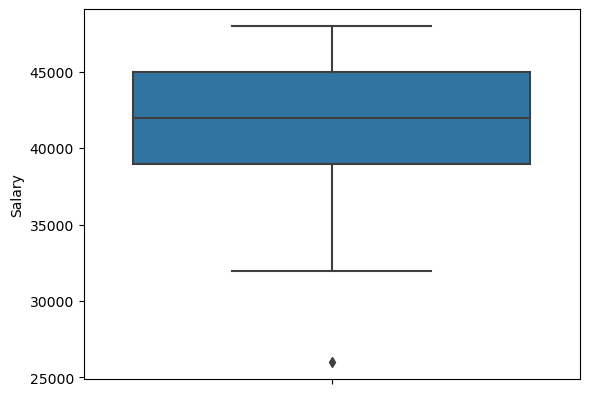

In [93]:
sns.boxplot(y="Salary", data=df10)

In [94]:
#here we can still see one dot, but that is nt outlier, its  value  is q1-1.5itr

# Adjustment of outliers - 2. Flooring or Caping option - no delete

In [95]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
iqr = Q3-Q1
upper_fence= Q3+1.5*iqr
lower_fence= Q1-1.5*iqr
print('upper fence \n', upper_fence)
print('\n lower fence \n', lower_fence)

upper fence 
 Age              64.5
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64

 lower fence 
 Age              12.5
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64


In [96]:
#here in flooring or capping, we will not drop the outliers, but replace it with some values

In [97]:
df11=df1.copy()

In [98]:
df11.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,40.727273,13.136364,41984.848485,2.148148
std,13.192342,10.616374,15490.160611,1.137533
min,19.000000,0.000000,20000.000000,0.000000
25%,32.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


In [99]:
#here we are replacing age > higher fence with higher fence and age < lower fence with lower fence
df11['Age'] = np.where(df11['Age']>upper_fence['Age'],upper_fence['Age'], np.where(df11['Age']<lower_fence['Age'], lower_fence['Age'],df11['Age']))

In [100]:
df11.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,39.924242,13.136364,41984.848485,2.148148
std,11.232246,10.616374,15490.160611,1.137533
min,19.000000,0.000000,20000.000000,0.000000
25%,32.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,64.500000,50.000000,90000.000000,5.000000


In [101]:
#here min is replaced with lower fence,10 and max is replaced with higher fence 73.8

In [102]:
#can be done on salary

In [103]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [104]:
# in cappoing, observations are not dropped unlike removing/deleting outliers

# using z-score method

In [105]:
#upper_fence=mean+3sd(standard deviaition)
#lower_fence=mean-3sd(standard deviaition)

In [106]:
df12 =df1.copy()


In [107]:
df12.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,40.727273,13.136364,41984.848485,2.148148
std,13.192342,10.616374,15490.160611,1.137533
min,19.000000,0.000000,20000.000000,0.000000
25%,32.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,75.000000,50.000000,90000.000000,5.000000


In [108]:
up_fence = df12.mean()+3*df12.std()
lower_fence = df12.mean()-3*df12.std()
print('upper fence \n ', up_fence)
print('lower fence \n ', lower_fence)

upper fence 
  Age              80.304298
Experience       44.985484
Salary        88455.330318
Projects          5.560747
dtype: float64
lower fence 
  Age              1.150248
Experience     -18.712757
Salary       -4485.633348
Projects        -1.264451
dtype: float64


/tmp/ipykernel_10543/3918325074.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  up_fence = df12.mean()+3*df12.std()
/tmp/ipykernel_10543/3918325074.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lower_fence = df12.mean()-3*df12.std()


In [109]:
#z-score  is not much used , beacause here age upper fence is 90 & age lower fence is -16
#actually age itself has max till 75  only
#only 5% of data will be 3*s.d

# label encoding

In [110]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [111]:
#here Dept,Education etc are categorical data
#ml algo will not be able to work on categorical data, so its required to convert categorical values(string) to numbers
#this is called label encoding

In [112]:
#so once categorical data is replaced with numbers, it is ready to feed to ml model

In [113]:
df11['Dept'].value_counts()

HR           15
IT            8
Sales         6
Marketing     4
Name: Dept, dtype: int64

In [114]:
#label encoding follows dicitonary pattern- first letter in Dept name, HR - 0, IT- 1, Marketing - 2, Sales- 3

In [115]:
df14 = df11.copy()

# 1st aproach - function astype approach

In [116]:
df14['Dept'] = df14['Dept'].astype('category')
#this will treat it as catgeory

In [117]:
df14.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,Under_Graduate,0.0
1,HR,33.000000,12.0,48000.0,Master,0.0
2,IT,35.000000,12.0,45000.0,Master,5.0
3,IT,37.333333,12.0,46000.0,Graduate,5.0
4,HR,34.000000,11.0,42000.0,Graduate,2.0


In [1]:
df14['Dept'] = df14['Dept'].cat.codes
#this will convert to codes
df14

NameError: name 'df14' is not defined

In [119]:
df14.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,Under_Graduate,0.0
1,0,33.000000,12.0,48000.0,Master,0.0
2,1,35.000000,12.0,45000.0,Master,5.0
3,1,37.333333,12.0,46000.0,Graduate,5.0
4,0,34.000000,11.0,42000.0,Graduate,2.0


In [120]:
df14['Education'] = df14['Education'].astype('category').cat.codes

In [121]:
df14.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,2,0.0
1,0,33.000000,12.0,48000.0,1,0.0
2,1,35.000000,12.0,45000.0,1,5.0
3,1,37.333333,12.0,46000.0,0,5.0
4,0,34.000000,11.0,42000.0,0,2.0


In [122]:
#here we can see it replaced Education and Dept with numbers, this is done with alphabetical order

In [123]:
df14.head(100)

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,2,0.000000
1,0,33.000000,12.0,48000.0,1,0.000000
2,1,35.000000,12.0,45000.0,1,5.000000
3,1,37.333333,12.0,46000.0,0,5.000000
4,0,34.000000,11.0,42000.0,0,2.000000
5,1,33.000000,13.0,42000.0,1,1.000000
6,2,56.000000,12.0,39000.0,1,2.148148
7,0,37.333333,10.0,42000.0,1,2.148148
8,2,31.000000,12.0,36000.0,2,2.000000
9,1,45.000000,14.0,42000.0,1,3.000000


In [124]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     int8   
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     int8   
 5   Projects    33 non-null     float64
dtypes: float64(4), int8(2)
memory usage: 1.2 KB


In [125]:
#now even data type of Dept,Education changed frm object to int

# 2nd aproach(label encoding) - sklearn label encoder

In [126]:
df15 = df1.copy()

In [127]:
from sklearn import preprocessing

In [128]:
label = preprocessing.LabelEncoder()

In [129]:
df15['Dept'] = label.fit_transform(df15['Dept'])

In [130]:
df15.head()


,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,Under_Graduate,0.0
1,0,33.000000,12.0,48000.0,Master,0.0
2,1,35.000000,12.0,45000.0,Master,5.0
3,1,37.333333,12.0,46000.0,Graduate,5.0
4,0,34.000000,11.0,42000.0,Graduate,2.0


In [131]:
df15['Education'] = label.fit_transform(df15['Education'])

In [132]:
df15.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,2,0.0
1,0,33.000000,12.0,48000.0,1,0.0
2,1,35.000000,12.0,45000.0,1,5.0
3,1,37.333333,12.0,46000.0,0,5.0
4,0,34.000000,11.0,42000.0,0,2.0


In [133]:
df17 = df1.copy()

In [134]:
df17['Education'] = label.fit(df16['Education'])

NameError: name 'df16' is not defined

In [ ]:
df17['Education'] = label.transform(df16['Education'])

In [ ]:
df17.head()

# one hot encoding

In [ ]:
#we use this becuase for one categorical data it will not assign one large number
#suppose if we 25 Dept, label encoding can assign for one cateory 0 , for last it wil be 25
#machine will give weighatge to one value which is 25, instaeda of category with 0
#we need to remove this weightage
#hence we go for one hot encoding
#here for Dept, it wil create colmns for each category 
#                    hr it tech
#1st row if it is hr - 1 0   0
#2nd row if it s it -  0 1   0

#disadvantage - it creates unnecessary extra columns, makes data complex
#creates sparse data - useless data

#so only if distinct catgeories are huge in number, we can go wth this
#if no of catgeories is just 3/4, we can use above approach

In [ ]:
#get_dummies approach

In [ ]:
df17 = df1.copy()

In [ ]:
df17.head()

In [ ]:
df17 = pd.get_dummies(df17, columns=['Dept', 'Education'])

In [ ]:
df17.head(100)

In [ ]:
#multi collinearity - machine will not learn new thing
#we should drop dummy column because machine are not learning any new information
#the macnine knows there are  4 depts, if 
#if in that row it says 1 0 0 obviously Dept_marleting wil be 0 , it doesnt last extra column to understand, 
#it wud be obvious
#the last column wil not help in learning new thing

In [ ]:
df17_dropdummy=df17.drop(["Dept_HR","Education_Graduate"],axis=1)

In [ ]:
df17_dropdummy.head()

In [ ]:
#here dept_it, and one column in  education got dropped

In [135]:
df17.corr()

,Age,Experience,Salary,Projects
Age,1.000000,0.735774,0.429488,0.113864
Experience,0.735774,1.000000,0.561641,0.057935
Salary,0.429488,0.561641,1.000000,0.014549
Projects,0.113864,0.057935,0.014549,1.000000
